# Lab 1

Start - 6 October 2025.\
Deadline - 21 October 2025, 09:30.

*All solutions must be in a <ins>single Colab Jupyter Notebook file</ins> and uploaded to the <ins>LMS portal</ins> as the link to __your__ completed notebook in Colab.*

In [ ]:
import unittest

import numpy
import pandas
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm
import statsmodels.api as sm
from matplotlib.pyplot import figure
from datetime import date, timedelta
from typing import List, Tuple
from math import exp, log, sqrt
import os
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


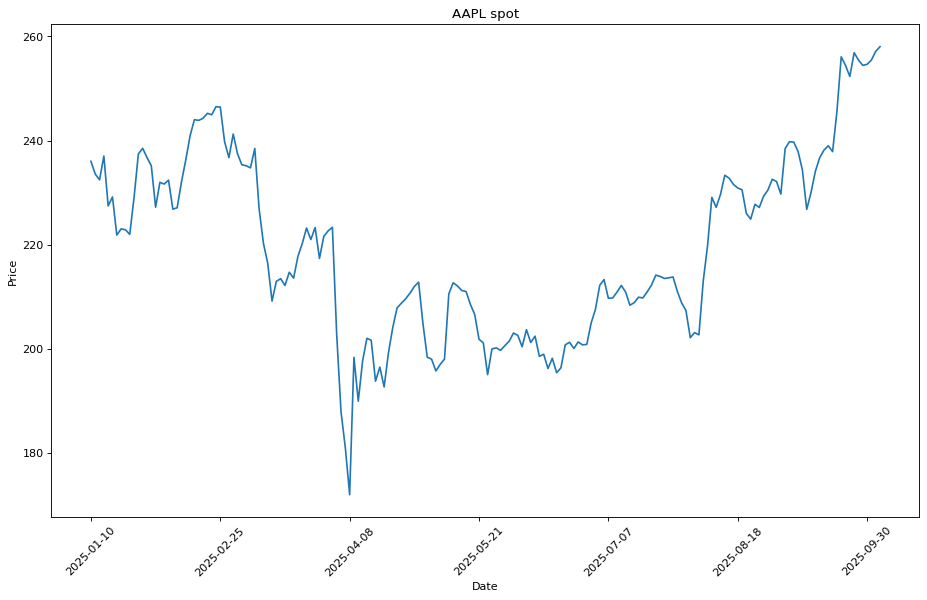

In [ ]:
underlying = "AAPL"

indexValues = pandas.read_csv(io.StringIO(uploaded['AAPL.csv'].decode('utf-8')))
indexDates = indexValues['Date'].to_list()
# indexValues = indexValues.set_index("Date", drop=True)
quotes = indexValues["underlyingPrice"]

figure(figsize=(14, 8), dpi=80)

plt.plot(indexValues["underlyingPrice"])
plt.title(f"{underlying} spot")
plt.xlabel("Date")
plt.ylabel("Price")


step = 30
positions = range(0, len(indexDates), step)
labels = [indexDates[i] for i in positions]

plt.xticks(ticks=positions, labels=labels, rotation=45)
plt.show()

## Task 1: Pricing - 1 point

1. Implement the valuation of a call option using the Black-Scholes-Merton formula. Consider the interest rate is constant.

In [ ]:
def PVCallBS(
    spotPrices: numpy.array,
    strike: float,
    maturity: float,
    rate: float,
    volatility: float
) -> numpy.array:
    pass
    # your code here

2. Implement the valuation of a Greeks (Delta, Gamma, Vega, Volga, Vanna) for the call option within the Black-Scholes-Merton model.

In [ ]:
# your code here

3. Ensure the following unit tests pass.

In [ ]:
class TestPVCallBS(unittest.TestCase):
    def testZeroStrike(self):
        self.assertAlmostEqual(
            PVCallBS(
                spotPrices=100,
                strike=0.0001,
                maturity=1.0,
                rate=0.05,
                volatility=0.2
            ),
            100,
            delta=0.0001
        )
    def testRate(self):
        self.assertNotEqual(
            PVCallBS(
                spotPrices=100,
                strike=1,
                maturity=1.0,
                rate=0.1,
                volatility=0.2
            ),
            PVCallBS(
                spotPrices=100,
                strike=1,
                maturity=1.0,
                rate=0.2,
                volatility=0.2
            )
        )
    def testVolatility(self):
        self.assertAlmostEqual(
            PVCallBS(
                spotPrices=100,
                strike=1000,
                maturity=1.0,
                rate=0.1,
                volatility=0.01
            ),
            0,
            delta=0.0001
        )

suite = unittest.TestSuite()
suite.addTest(TestPVCallBS('testZeroStrike'))
suite.addTest(TestPVCallBS('testRate'))
suite.addTest(TestPVCallBS('testVolatility'))

runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

## Task 1: Trading - 2 points

Consider the following scenario.\
We sold a call option on AAPL stock with a strike of 220 and expiration date 2025-10-03.\
The trade start date is 2025-02-10.

1. Download the provided data table. Estimate the realized volatility using data from the "underlyingPrice" column from 2025-01-10 until the trade start date.

In [ ]:
# your code here

2. Implement the calculation of the financial result for a self-financing hedging strategy of a portfolio containing AAPL stock and cash. The number of shares in the strategy equals the option's Delta. Use the volatility obtained in the previous step for calculations.

In [ ]:
# your code here

3. Plot the time evolution of the financial result.

In [ ]:
# your code here

## Task 2: Thinking - 3 points

1. Assume we take constant volatility parameter with value equal 0.5.\
Decompose the hedging error into components. Plot the results.\
Explain sign of each component and factors affecting its size.

In [ ]:
# your code here

3. Assume we recalibrate the volatility parameter in the model to match the implied volatility obtained from the market for the corresponding sold call option, with these values located in the "impliedVolatility" column of the data table.\
Decompose the hedging error into components. Plot the results.\
Explain sign of each component and factors affecting its size.

In [ ]:
# your code here

4. Assume we recalibrate the volatility parameter in the model using estimates derived from a GARCH(1,1) model calibrated on daily historical stock price, with these values located in the "instantaneousVolatility" column of the data table.\
Decompose the hedging error into components. Plot the results.\
Explain sign of each component and factors affecting its size.

In [ ]:
# your code here